In [1]:
# stocker
# https://towardsdatascience.com/stock-analysis-in-python-a0054e2c1a4c
# https://github.com/WillKoehrsen/Data-Analysis/blob/master/stocker/readme.md

# yfinance
# https://towardsdatascience.com/free-stock-data-for-python-using-yahoo-finance-api-9dafd96cad2e


#Make a daily 1 dimension linear regression (time series?)
#For each day, based on the last 260 (or 365) periods, determine if current price is higher than mean prediction
#Determine if the day is a good day to buy or bad day
#For continual investing, what of I just trendline the last 1-5 years and algorithmicly invest more for worse than avg performance?


##### In progress notes

For my multistock code, I could try to make another dictionary of dataframes instead of assigning a bunch of freestanding dataframes

I still want stocker someday - to look at the built in pred function

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#import pylab
#import seaborn
import numpy as np
import datetime

In [3]:
# Arguments     Scenarios                                                                             Example value

# period        date period to download                                     1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# interval      data interval. If it’s intraday data, the interval needs to be set within 60 days 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# start         If period is not set- Download start date string (YYYY-MM-DD) or datetime             2020-03-18
# end           If period is not set - Download end date string (YYYY-MM-DD) or datetime              2020-03-19
# prepost       Boolean value to include Pre and Post market data                                     Default is False
# auto_adjust   Boolean value to adjust all OHLC                                                      Default is True
# actions       Boolean value download stock dividends and stock splits events                        Default is True

In [4]:
# Master list for use throughout the script

lista = ['AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MSFT', 'NVDA', 'QQQ', 'SBUX', 'SQ', 'TSLA', 'TSM']

In [5]:
# Pull the clising data

data = yf.download(
        tickers = 'AAPL, AMD, AMZN, CRM, GOOG, INTC, MSFT, NVDA, QQQ, SBUX, SQ, TSLA, TSM',
        period = '1y',
        #group_by = 'ticker'
    )

df = data['Close']#['AAPL']
df

[*********************100%***********************]  13 of 13 completed


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM
Date,,,,,,,,,,,,,
2020-08-31,129.039993,90.820000,3450.959961,272.649994,1634.180054,50.950001,225.529999,133.744995,294.880005,84.470001,159.559998,498.320007,79.250000
2020-09-01,134.179993,92.180000,3499.120117,281.250000,1660.709961,50.790001,227.270004,138.210007,299.920013,86.050003,166.660004,475.049988,81.550003
2020-09-02,131.399994,90.220001,3531.449951,276.690002,1728.280029,52.250000,231.649994,143.464996,302.760010,88.349998,162.880005,447.369995,82.169998
2020-09-03,120.879997,82.540001,3368.000000,265.010010,1641.839966,50.389999,217.300003,130.154999,287.410004,86.480003,152.860001,407.000000,81.180000
2020-09-04,120.959999,82.010002,3294.620117,254.699997,1591.040039,50.080002,214.250000,126.224998,283.579987,86.269997,146.389999,418.320007,78.910004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,148.360001,108.300003,3299.179932,260.850006,2859.000000,53.810001,302.010010,222.130005,374.799988,115.570000,267.570007,711.200012,117.029999
2021-08-26,147.539993,107.269997,3316.000000,267.790009,2842.459961,53.130001,299.089996,220.679993,372.420013,114.320000,262.130005,701.159973,118.099998
2021-08-27,148.600006,111.400002,3349.629883,266.529999,2891.010010,53.889999,299.720001,226.360001,376.040009,115.120003,268.010010,711.919983,118.489998


In [6]:
# add index to df

df['Index'] = range(1,len(df)+1)
df

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AAPL,AMD,AMZN,CRM,GOOG,INTC,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM,Index
Date,,,,,,,,,,,,,,
2020-08-31,129.039993,90.820000,3450.959961,272.649994,1634.180054,50.950001,225.529999,133.744995,294.880005,84.470001,159.559998,498.320007,79.250000,1
2020-09-01,134.179993,92.180000,3499.120117,281.250000,1660.709961,50.790001,227.270004,138.210007,299.920013,86.050003,166.660004,475.049988,81.550003,2
2020-09-02,131.399994,90.220001,3531.449951,276.690002,1728.280029,52.250000,231.649994,143.464996,302.760010,88.349998,162.880005,447.369995,82.169998,3
2020-09-03,120.879997,82.540001,3368.000000,265.010010,1641.839966,50.389999,217.300003,130.154999,287.410004,86.480003,152.860001,407.000000,81.180000,4
2020-09-04,120.959999,82.010002,3294.620117,254.699997,1591.040039,50.080002,214.250000,126.224998,283.579987,86.269997,146.389999,418.320007,78.910004,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,148.360001,108.300003,3299.179932,260.850006,2859.000000,53.810001,302.010010,222.130005,374.799988,115.570000,267.570007,711.200012,117.029999,249
2021-08-26,147.539993,107.269997,3316.000000,267.790009,2842.459961,53.130001,299.089996,220.679993,372.420013,114.320000,262.130005,701.159973,118.099998,250
2021-08-27,148.600006,111.400002,3349.629883,266.529999,2891.010010,53.889999,299.720001,226.360001,376.040009,115.120003,268.010010,711.919983,118.489998,251


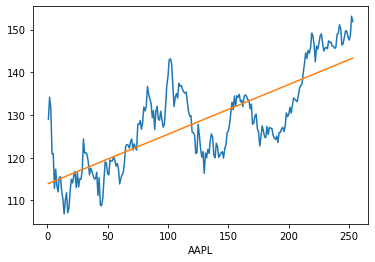

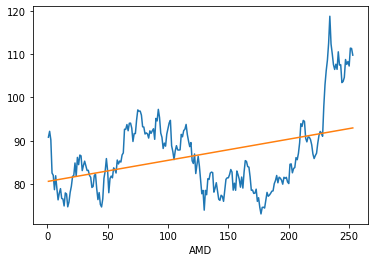

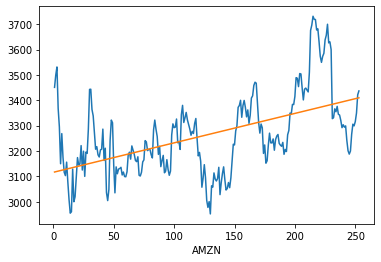

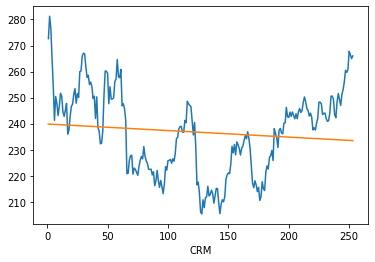

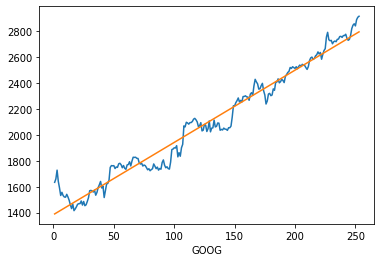

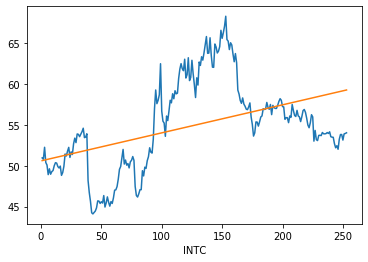

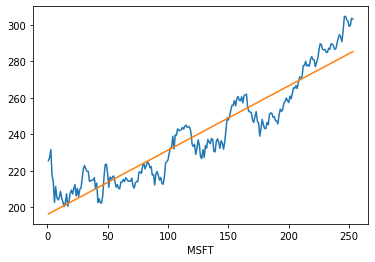

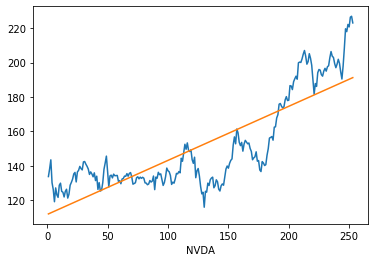

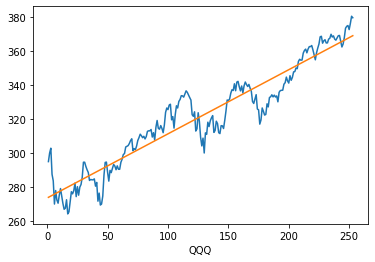

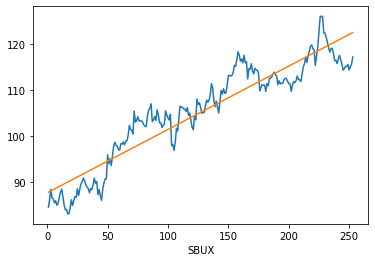

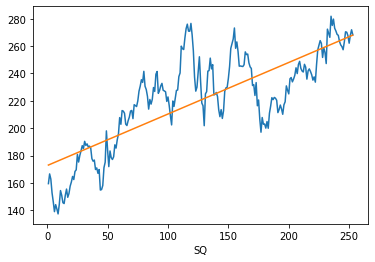

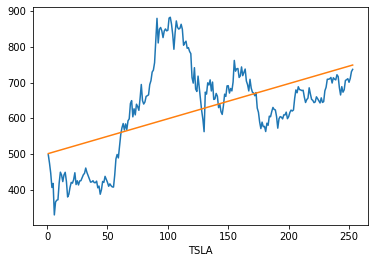

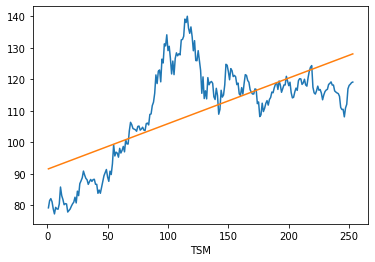

In [7]:
# plot data with a trendline

for i in lista:
    x = df['Index']
    y = df[i]

    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    plt.xlabel(i)
    plt.show()

In [8]:
df

,AAPL,AMD,AMZN,CRM,GOOG,INTC,MSFT,NVDA,QQQ,SBUX,SQ,TSLA,TSM,Index
Date,,,,,,,,,,,,,,
2020-08-31,129.039993,90.820000,3450.959961,272.649994,1634.180054,50.950001,225.529999,133.744995,294.880005,84.470001,159.559998,498.320007,79.250000,1
2020-09-01,134.179993,92.180000,3499.120117,281.250000,1660.709961,50.790001,227.270004,138.210007,299.920013,86.050003,166.660004,475.049988,81.550003,2
2020-09-02,131.399994,90.220001,3531.449951,276.690002,1728.280029,52.250000,231.649994,143.464996,302.760010,88.349998,162.880005,447.369995,82.169998,3
2020-09-03,120.879997,82.540001,3368.000000,265.010010,1641.839966,50.389999,217.300003,130.154999,287.410004,86.480003,152.860001,407.000000,81.180000,4
2020-09-04,120.959999,82.010002,3294.620117,254.699997,1591.040039,50.080002,214.250000,126.224998,283.579987,86.269997,146.389999,418.320007,78.910004,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,148.360001,108.300003,3299.179932,260.850006,2859.000000,53.810001,302.010010,222.130005,374.799988,115.570000,267.570007,711.200012,117.029999,249
2021-08-26,147.539993,107.269997,3316.000000,267.790009,2842.459961,53.130001,299.089996,220.679993,372.420013,114.320000,262.130005,701.159973,118.099998,250
2021-08-27,148.600006,111.400002,3349.629883,266.529999,2891.010010,53.889999,299.720001,226.360001,376.040009,115.120003,268.010010,711.919983,118.489998,251


In [9]:
# create pred and pred/close list

for e in lista:
    nlist = []
    ylist = []
    y = df[str(e)]
    
    for i in range(1,len(df)+1):
        x = df['Index']
        m, b = np.polyfit(x, y, 1)
        d = m*i+b
        nlist.append(d)
        
    df[str(e) + ' pred'] = nlist
    df['temp pred'] = nlist
    df['temp'] = df[str(e)]

    for i in range(1,len(df)+1):
        d = (df['temp pred'].iloc[i-1])/(df['temp'].iloc[i-1])
        ylist.append(d)

    df[str(e) + ' pred/close'] = ylist

df

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,AAPL,AMD,AMZN,CRM,GOOG,INTC,MSFT,NVDA,QQQ,SBUX,...,QQQ pred,QQQ pred/close,SBUX pred,SBUX pred/close,SQ pred,SQ pred/close,TSLA pred,TSLA pred/close,TSM pred,TSM pred/close
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.039993,90.820000,3450.959961,272.649994,1634.180054,50.950001,225.529999,133.744995,294.880005,84.470001,...,273.898606,0.928848,87.728609,1.038577,173.137235,1.085092,501.822323,1.007028,91.623052,1.156127
2020-09-01,134.179993,92.180000,3499.120117,281.250000,1660.709961,50.790001,227.270004,138.210007,299.920013,86.050003,...,274.275332,0.914495,87.866626,1.021111,173.513694,1.041124,502.804753,1.058425,91.767824,1.125295
2020-09-02,131.399994,90.220001,3531.449951,276.690002,1728.280029,52.250000,231.649994,143.464996,302.760010,88.349998,...,274.652058,0.907161,88.004644,0.996091,173.890152,1.067597,503.787183,1.126109,91.912596,1.118566
2020-09-03,120.879997,82.540001,3368.000000,265.010010,1641.839966,50.389999,217.300003,130.154999,287.410004,86.480003,...,275.028784,0.956921,88.142661,1.019226,174.266610,1.140041,504.769613,1.240220,92.057367,1.133991
2020-09-04,120.959999,82.010002,3294.620117,254.699997,1591.040039,50.080002,214.250000,126.224998,283.579987,86.269997,...,275.405510,0.971174,88.280678,1.023307,174.643069,1.192999,505.752043,1.209008,92.202139,1.168447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,148.360001,108.300003,3299.179932,260.850006,2859.000000,53.810001,302.010010,222.130005,374.799988,115.570000,...,367.326667,0.980061,121.956871,1.055264,266.498907,0.995997,745.464952,1.048179,127.526477,1.089690
2021-08-26,147.539993,107.269997,3316.000000,267.790009,2842.459961,53.130001,299.089996,220.679993,372.420013,114.320000,...,367.703393,0.987335,122.094889,1.068010,266.875365,1.018103,746.447382,1.064589,127.671248,1.081044
2021-08-27,148.600006,111.400002,3349.629883,266.529999,2891.010010,53.889999,299.720001,226.360001,376.040009,115.120003,...,368.080119,0.978832,122.232906,1.061787,267.251824,0.997171,747.429812,1.049879,127.816020,1.078707


In [22]:
# For each stock, print the most recent predition/close ratio based on 1 year of data
# higher than 1 = the stock is currently less than predicted
# less than 1 = the stock is currently higher than predicted

print ('Current date/time: ', datetime.datetime.now().strftime("%B %d, %Y %H:%M:%S"))
print('')

for e in lista:
    print(e,round(df[str(e) + ' pred/close'].iloc[len(df)-1],4))
    print('')

Current date/time:  August 31, 2021 07:46:54

AAPL 0.9436

AMD 0.8468

AMZN 0.9921

CRM 0.8778

GOOG 0.9587

INTC 1.0968

MSFT 0.941

NVDA 0.8575

QQQ 0.9722

SBUX 1.0455

SQ 0.9989

TSLA 1.0164

TSM 1.0751

